# Pymaceuticals Inc
---
### Analysis
- The Capomulin and Ramicane drugs were tested more than the other two drugs as per the bar chart abd also there is 51% of the samepled mice were male so, more male mouse has been used than female as we can see on the pie chart.
- The Scatter Plot for Capomulin shows a positive correlation between weight and the average tumor volume as we can see the pearson's correlation shows r value of 0.84

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
merged_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
mouse_numbers = merged_df["Mouse ID"].nunique()
mouse_numbers

249

In [6]:
duplicated_ID = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicated_ID

array(['g989'], dtype=object)

In [7]:
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicated_ID)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
new_mice_no = clean_df["Mouse ID"].nunique()
new_mice_no

248

# Summary Statistics

In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [10]:
clean_df['Mouse ID'].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'h246', 'h333', 'h428', 'h531', 'i386',
      

In [11]:
clean_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen

mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
variance = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
sd = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()\

summary_stats = pd.DataFrame({"Mean Tumor Vol": mean,
                             "Median Tumor Vol": median,
                             "Tumor Vol Variance": variance,
                             "Tumor Vol Std. Dev.": sd,
                             "Tumor Volume Std. Err.": sem})
summary_stats


,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

clean_df["Timepoint"].unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [15]:
timepoint_count = clean_df["Drug Regimen"].value_counts()
timepoint_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

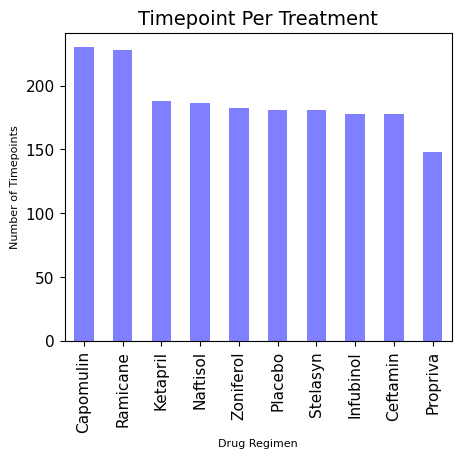

In [16]:
# Bar chart using PANDAS:
plot_pandas = timepoint_count.plot.bar(figsize=(5,4), color='b', alpha=0.5, fontsize = 11)
plt.xlabel("Drug Regimen", fontsize = 8)
plt.ylabel("Number of Timepoints", fontsize = 8)
plt.title("Timepoint Per Treatment", fontsize = 14)

plt.show()

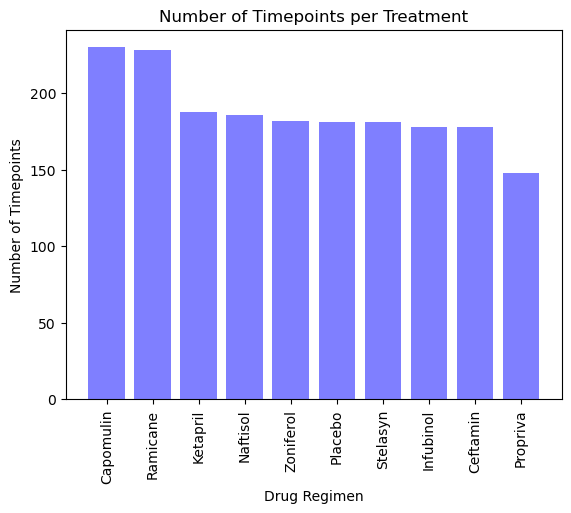

In [17]:
# Bar Chart using PyPlot:
x_axis = timepoint_count.index.values
y_axis = timepoint_count.values

plt.bar(x_axis, y_axis, color='b', alpha=0.5, align='center')
plt.title("Number of Timepoints per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation="vertical")

plt.show()


In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_data = clean_df["Sex"].value_counts()
gender_data

Male      958
Female    922
Name: Sex, dtype: int64

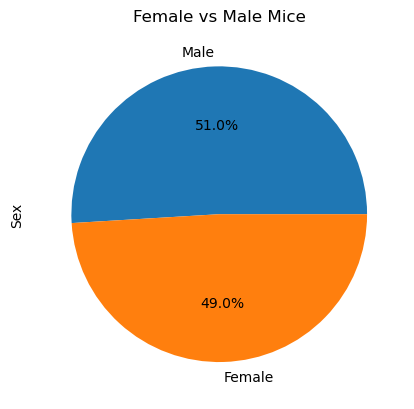

In [19]:
gender_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs Male Mice")
plt.show()

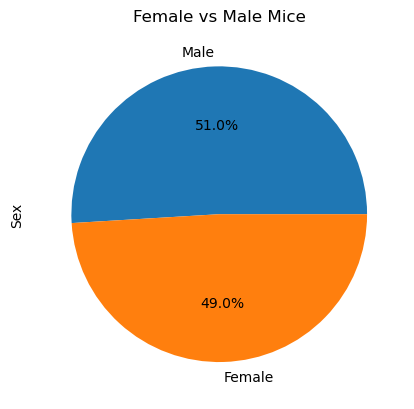

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plot = gender_data.plot.pie(y='Total Count', autopct= "%1.1f%%")
labels = ['Female', 'Male']
sizes = [49, 50]
plt.title('Female vs Male Mice')
plt.ylabel('Sex')
plt.show()

# Line Plot and Scatter Plot

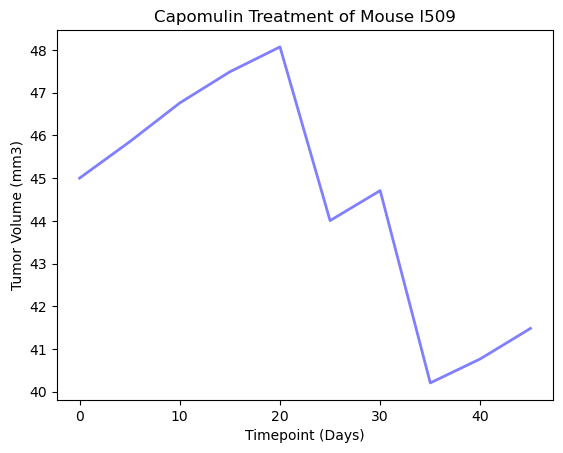

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

foreline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
x_axis = foreline_df["Timepoint"]
tumvol = foreline_df["Tumor Volume (mm3)"]

plt.plot(x_axis, tumvol, linewidth=2, color="b",alpha=0.5, label="Fahreneit")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

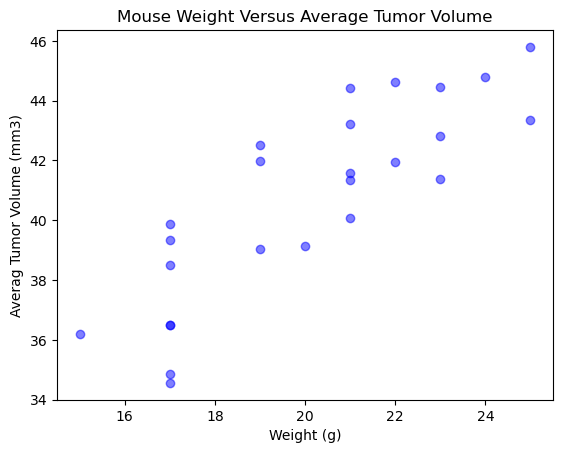

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
ave_tmr_vol = Capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(ave_tmr_vol['Weight (g)'], ave_tmr_vol['Tumor Volume (mm3)'], color='blue', alpha=0.5)
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

# Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for 
# the Capomulin regimen
ave_tmr_vol = Capomulin_df.groupby(['Mouse ID']).mean()

mouse_weight = ave_tmr_vol["Weight (g)"]
average_tmr = ave_tmr_vol["Tumor Volume (mm3)"]
correlation = st.pearsonr(mouse_weight, average_tmr)
print(f'The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}')

The correlation between mouse weight and average tumor volume is 0.84


In [24]:
from scipy.stats import linregress
from sklearn import datasets

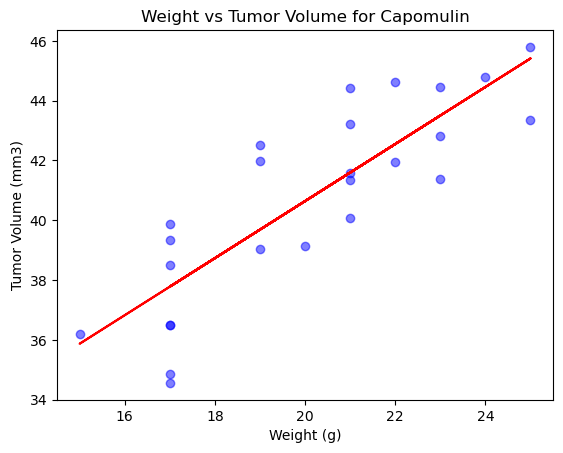

In [25]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(ave_tmr_vol["Weight (g)"],ave_tmr_vol["Tumor Volume (mm3)"])
regress_values=ave_tmr_vol["Weight (g)"]* slope + intercept



plt.scatter(ave_tmr_vol["Weight (g)"], ave_tmr_vol["Tumor Volume (mm3)"], color='b', alpha=0.5)
plt.plot(ave_tmr_vol["Weight (g)"], regress_values, color='red')

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

# Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_id = clean_df.groupby(["Mouse ID"]).max()
mouse_id_index = mouse_id.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_data = mouse_id_index[['Mouse ID', 'Timepoint']].merge(clean_df,on=['Mouse ID','Timepoint'], how="left")
mouse_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [29]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

plotting = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
for drug in treatments:
    tumor_vol = mouse_data.loc[mouse_data["Drug Regimen"] == drug]['Tumor Volume (mm3)']
    
    plotting.append(tumor_vol)
    
    quartiles = tumor_vol.quantile([.25,.5,.75])
    first_quart = quartiles[0.25]
    last_quart = quartiles[0.75]
    quart_range = last_quart - first_quart
    lower_bound = first_quart - (1.5 * quart_range)
    upper_bound = last_quart + (1.5 * quart_range)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")   

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


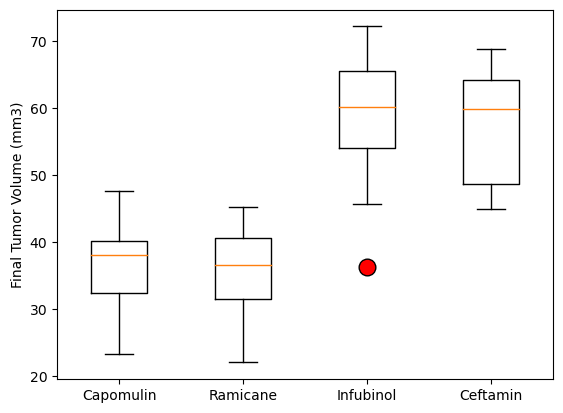

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, markeredgecolor='black')
label = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

plt.boxplot(plotting,flierprops=flierprops, labels = label)
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()